In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import timedelta


# The aim of this notebook: Exploratory Data Analysis

In this notebook, the MAPM (Predictive Maintenance) dataset from xxx is analyzed to understand and prepare the data, laying the foundation for subsequent machine learning modeling.

The analysis includes the following steps:

* 📊 **Data Cleaning:** Loading and combining the raw datasets. The data is checked for missing values and duplicates and then cleaned.
* 📈 **Descriptive Analysis:** Statistical key figures and variable distributions are calculated to get an initial overview of the data.
* 🎨 **Visualization:** Correlations, relationships, and the distribution of variables are visualized to identify patterns and anomalies.
* ⚙️ **Feature Engineering:** New, meaningful features are derived from the existing data to improve the predictive performance of the models.
* ✅ **Dataset Export:** The cleaned and prepared dataset is saved to be used in a separate notebook for model development.

This EDA serves to reveal the key characteristics of the dataset and to make informed decisions for the subsequent modeling steps.

## 📊 Data Cleaning:

The raw data is loaded from the provided CSV files and combined into a single DataFrame. The initial step of data cleaning focuses on ensuring the dataset's quality and integrity before any analysis or modeling.

The following operations are performed:

* **Handling Missing Values:** Although this dataset contains no missing values, it's a crucial step in any data cleaning process. Typically, missing values are identified and addressed to prevent them from negatively impacting the model's performance. Common strategies include:
    * **Imputation:** Filling in missing values with a placeholder, such as the mean, median, or mode of the feature.
    * **Forward- or Backfilling:** Carrying forward the last known valid observation or propagating the next valid observation backwards, often used in time-series data.
    * **Deletion:** Removing rows or columns with a high percentage of missing values if imputation is not feasible.

* **Checking for Duplicates:** The dataset is checked for duplicate entries that could skew the analysis. Any duplicate rows are removed to ensure each record is unique and accurate.
* **Data Type Conversion:** Feature data types are verified and converted as needed. This includes converting the 'datetime' column to the proper datetime format to enable time-series analysis and feature engineering.

This meticulous data cleaning process guarantees that the data used for subsequent exploratory analysis and machine learning is reliable and free from common issues that can compromise results.

### Loading and Combining Raw Data


This step focuses on taking the raw data from various sources and combining it into a single, manageable DataFrame. This is the first and most fundamental step of any data analysis project.

The following operations are performed:

* **Data Import:** The data is loaded from the individual CSV files (`.csv`), each containing a specific type of information (e.g., telemetry, maintenance data, failure history).
* **Dataset Combination:** The different datasets are merged (e.g., using a `merge` or `join` operation) on one or more common columns, such as `datetime` and `machineID`. This creates a comprehensive dataset that contains all relevant information for each individual observation.

This step ensures that all data is in a unified structure, which is essential for subsequent data cleaning and analysis.

#### Loading and Initial Inspection
The raw error data is loaded from the differnt .csv.gz files into Pandas DataFrames. 

Displaying the first five rows is a standard and essential practice to quickly verify that the data has been loaded correctly and to get a first impression of its structure, including column names and data types.

In [2]:
df_errors = pd.read_csv('../datasets/mapm/PdM_errors.csv.gz')
df_errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [3]:
df_failures = pd.read_csv('../datasets/mapm/PdM_failures.csv.gz')
df_failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [4]:
df_machines = pd.read_csv('../datasets/mapm/PdM_machines.csv.gz')
df_machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [5]:
df_maint = pd.read_csv('../datasets/mapm/PdM_maint.csv.gz')
df_maint.head()


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [6]:
df_tele = pd.read_csv('../datasets/mapm/PdM_telemetry.csv.gz')
df_tele.head()


,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


#### Dataset Structure

The project utilizes data from several sources, each stored in a separate CSV file. Understanding the structure and relationships between these files is crucial for effective data merging and analysis.

* `PdM_telemetry.csv`: Contains time-series data from various sensors, including `voltage`, `rotate`, `pressure`, and `vibration` readings, recorded hourly for each `machineID`.
* `PdM_errors.csv`: Records error events, detailing the `datetime` and the `errorID` for each machine. An error represents an event that occurred on a machine but is not necessarily a full component failure.
* `PdM_failures.csv`: Contains the history of actual component failures. This file details the `datetime` of the failure and the `failure` type (`comp1`, `comp2`, etc.) for each `machineID`. This is the **target variable** for the predictive model.
* `PdM_maint.csv`: Provides a history of maintenance events, including `datetime`, `comp` (component replaced) for each machine. This data can be used to engineer features that capture the recency of maintenance activities.
* `PdM_machines.csv`: Contains static, high-level information about each machine, such as `age` and `model`. This data is useful for creating features that characterize individual machines.

The datasets are linked primarily by `datetime` and `machineID`, allowing for the creation of a comprehensive, unified dataset.

#### Data Cleaning: Checking for Missing Values and Duplicates

This step is crucial for ensuring the data's integrity before any further analysis. The initial data check focuses on identifying and handling common issues such as missing values and duplicate rows. This process is performed individually for each of the raw data files (`telemetry`, `errors`, `failures`, `maint`, and `machines`) and then again on the final merged dataset to ensure no new issues were introduced during the combination.

The following checks are performed:

* **Missing Values:** We check each DataFrame for the presence of missing (null) values. While this specific dataset is clean, a standard procedure involves identifying the number and percentage of missing values per column and applying a suitable strategy, such as **imputation** or **deletion**, to handle them.
* **Duplicate Rows:** We check for and remove any rows that are exact duplicates across all columns. Duplicates can skew the analysis and must be removed to ensure that each record is unique and represents a single observation.

In [7]:
# Checking for missing values in each DataFrame
print("Missing values in `df_telemetry`:")
print(df_tele.isnull().sum())

Missing values in `df_telemetry`:
datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64


In [8]:
print("Missing values in `df_errors`:")
print(df_errors.isnull().sum())

Missing values in `df_errors`:
datetime     0
machineID    0
errorID      0
dtype: int64


In [9]:
print("Missing values in `df_failures`:")
print(df_failures.isnull().sum())

Missing values in `df_failures`:
datetime     0
machineID    0
failure      0
dtype: int64


In [10]:
print("Missing values in `df_maint`:")
print(df_maint.isnull().sum())

Missing values in `df_maint`:
datetime     0
machineID    0
comp         0
dtype: int64


In [11]:
print("Missing values in `df_machines`:")
print(df_machines.isnull().sum())

Missing values in `df_machines`:
machineID    0
model        0
age          0
dtype: int64


In [12]:
# Checking for duplicates in each DataFrame
print("Number of duplicates in `df_tele`:", df_tele.duplicated().sum())
print("\n" + "="*50 + "\n")

print("Number of duplicates in `df_errors`:", df_errors.duplicated().sum())
print("\n" + "="*50 + "\n")

print("Number of duplicates in `df_failures`:", df_failures.duplicated().sum())
print("\n" + "="*50 + "\n")

print("Number of duplicates in `df_maint`:", df_maint.duplicated().sum())
print("\n" + "="*50 + "\n")

print("Number of duplicates in `df_machines`:", df_machines.duplicated().sum())
print("\n" + "="*50 + "\n")

Number of duplicates in `df_tele`: 0


Number of duplicates in `df_errors`: 0


Number of duplicates in `df_failures`: 0


Number of duplicates in `df_maint`: 0


Number of duplicates in `df_machines`: 0




#### Summary of Data Quality Checks

The analysis confirms that the datasets are clean:
* **No missing values** were found in any of the individual DataFrames.
* **No duplicate rows** were found, ensuring each record is a unique observation.

This indicates that the raw data is of high quality and ready for the next step of merging and feature engineering.

#### Combining DataFrames

This step involves merging the individual data sources into a single, comprehensive DataFrame. This unified table provides a holistic view of the data, allowing all relevant information—telemetry readings, errors, maintenance logs, machine details, and failure events—to be analyzed together.

The merging is performed using common key columns, specifically the `datetime` and `machineID`. This ensures that each record in the final DataFrame accurately represents a unique observation at a specific time for a particular machine. This process is crucial for creating the single dataset required for effective feature engineering and predictive modeling.

In [13]:
# Start with the telemetry data as the base DataFrame.
df = df_tele.copy()

# 1. Merge error data
# A left join is used to keep all telemetry records, even if no error occurred at that specific hour.
df = pd.merge(
    df,
    df_errors,
    on=['datetime', 'machineID'],
    how='left'
)

# 2. Merge maintenance data
# Merge maintenance logs using a left join to align them with the continuous telemetry stream.
df = pd.merge(
    df,
    df_maint,
    on=['datetime', 'machineID'],
    how='left'
)

# 3. Merge machine details
# Merge static machine information. This join is only on 'machineID' as the data is not time-dependent.
df = pd.merge(
    df,
    df_machines,
    on=['machineID'],
    how='left'
)

# 4. Merge failure history (the target variable)
# The final merge adds the failure history. A left join is crucial here, as it adds the target variable
# and will result in NaN values for rows where no failure occurred, which is the desired outcome.
df = pd.merge(
    df,
    df_failures[['datetime', 'machineID', 'failure']],
    on=['datetime', 'machineID'],
    how='left'
)

df.head()

,datetime,machineID,volt,rotate,pressure,vibration,errorID,comp,model,age,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,NaN,NaN,model3,18,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,NaN,NaN,model3,18,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,NaN,NaN,model3,18,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,NaN,NaN,model3,18,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,NaN,NaN,model3,18,NaN


Since errors, maintenance, and failures are not continuous events, there are many NaN values in the merged DataFrame. This is expected and a direct result of the left join operation, which preserves every row from the base telemetry dataset.

Handling Missing Values
While NaN values often indicate a problem, in this specific case, they carry important information.

errorID: A NaN in this column indicates that no error event occurred at that specific time.

comp (from maintenance data): A NaN here means no maintenance was performed.

failure (your target variable): A NaN in this column indicates that no component failure occurred at that exact time.

These NaN values before must be handled before training the model. The most suitable approach here is imputation with a specific placeholder value rather than using the mean or median, which would not make sense for these categorical columns.

In [14]:
# rename 'comp' to 'maint' for clarity
df.rename(columns={'comp': 'maint'}, inplace=True)

In [15]:
# Replace NaN values in the merged DataFrame with 0
df['errorID'] = df['errorID'].fillna(0)
df['maint'] = df['maint'].fillna(0)
df['failure'] = df['failure'].fillna(0)
df.head()

,datetime,machineID,volt,rotate,pressure,vibration,errorID,maint,model,age,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,model3,18,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,model3,18,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,model3,18,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0,0,model3,18,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0,0,model3,18,0


In [16]:
# Checking for missing values in the merged DataFrame
print("Missing values in the merged DataFrame:")
print(df.isnull().sum())


Missing values in the merged DataFrame:
datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
errorID      0
maint        0
model        0
age          0
failure      0
dtype: int64


In [17]:
# Checking for duplicates in the merged DataFrame
print("Number of duplicates in the merged DataFrame:", df.duplicated().sum())

Number of duplicates in the merged DataFrame: 0


#### Final Data Quality Check

The merged DataFrame has been created and thoroughly checked for integrity. The results confirm:

* **No new duplicate rows** were introduced during the merging process.
* **The dataset remains free of missing values** in all columns, ensuring a clean foundation for subsequent analysis.

This marks the completion of the data cleaning phase. The dataset is now clean, unified, and ready for further exploratory data analysis (EDA) and feature engineering to prepare it for machine learning modeling.

### Conversion of Datatypes

In [18]:
# Convert 'datetime' column to a proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M:%S")

## 📈 Descriptive Analysis and 🎨 Visualization:

**Descriptive analysis** involves summarizing and visualizing the main features of the data. This step is crucial for gaining an initial understanding of the dataset's characteristics without making any assumptions or predictions. By performing this analysis, you can:

* **Understand Data Distribution:** Get a clear picture of how your data is spread, identify outliers, and see the range of values for each feature.
* **Identify Relationships:** Discover initial correlations between variables, which can provide valuable insights for feature engineering and model building.
* **Verify Assumptions:** Confirm that the data is behaving as expected and identify any unexpected patterns or errors that might have been missed during the cleaning phase.

This process transforms raw numbers into meaningful information, serving as a foundational step before any complex modeling begins. It's the "getting to know your data" phase of the project.

In [19]:
# This step provides a summary of the main characteristics of the dataset, including count, mean,
# standard deviation, min, max, and quartiles for each numerical feature.
df.describe()


,datetime,machineID,volt,rotate,pressure,vibration,age
count,877209,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000
mean,2015-07-02 18:03:56.390187008,50.498446,170.780942,446.570735,100.861433,40.386459,11.330280
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054,0.000000
25%,2015-04-02 12:00:00,25.000000,160.305918,412.265479,93.499116,36.777911,7.000000
50%,2015-07-02 18:00:00,50.000000,170.609301,447.537538,100.426820,40.238339,12.000000
75%,2015-10-02 00:00:00,75.000000,181.008303,482.157025,107.557338,43.786484,16.000000
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072,20.000000
std,NaN,28.866697,15.511268,52.698963,11.052195,5.371894,5.827535


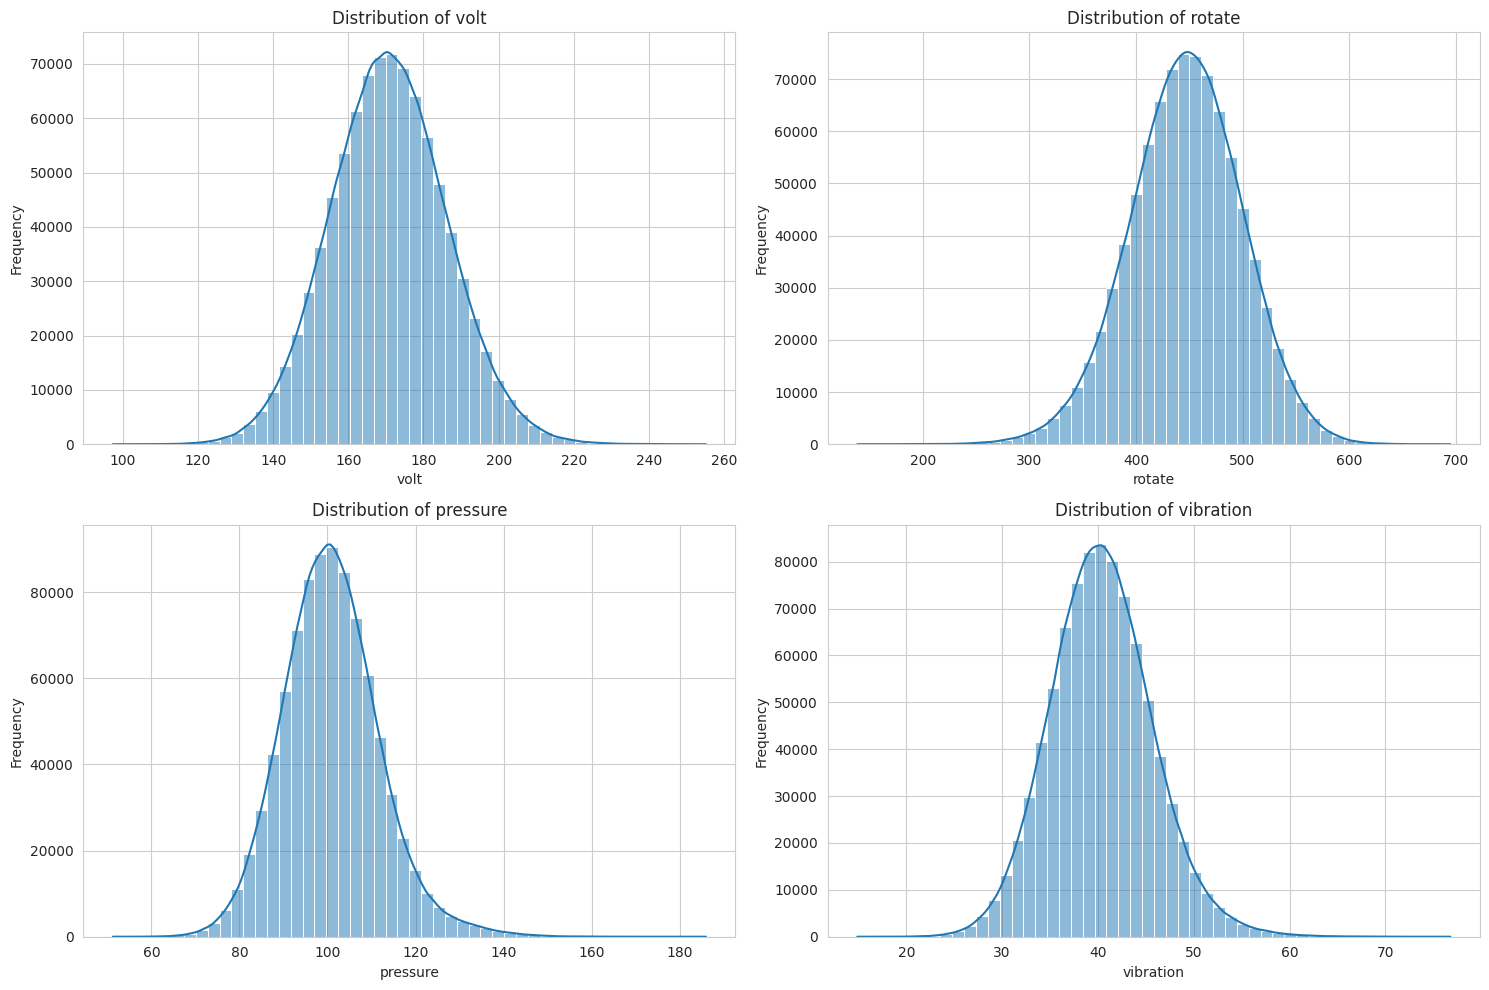

In [20]:
# Set up the plotting style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Select numerical columns for plotting
# Exclude categorical numerical columns like 'machineID'
numerical_cols = ['volt', 'rotate', 'pressure', 'vibration']

# Create a histogram for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Conclusion

Based on these histograms, the key conclusion is that the telemetry data (the sensor readings) follows an approximately **normal distribution**. This is a great starting point for many machine learning models as it means the majority of data points are clustered around the mean, with fewer occurrences as one moves further away.

***

### What if the data were not normally distributed?

If the data showed a different distribution (e.g., skewed, bimodal), here are some common techniques one could apply to handle it:

1.  **Transformations:** One can apply mathematical transformations to make the data more "normal-like." This can improve the performance of models that assume a normal distribution (e.g., linear regression, logistic regression, and Support Vector Machines).
    * **Log Transformation:** Useful for right-skewed data. It reduces the variability of the values and compresses the scale.
    * **Square Root Transformation:** Also effective for right-skewed data.
    * **Box-Cox Transformation:** A more generalized transformation that can handle both positive and negative values and automatically finds the best transformation parameter.
2.  **Robust Scalers:** Instead of using standard scaling, which can be sensitive to outliers, one could use a **robust scaler**. A robust scaler uses the median and interquartile range (IQR) to scale the data, making it less affected by extreme values.
3.  **Binning:** For highly skewed data, one can divide the values into bins or intervals. This can convert a continuous variable into a categorical one, which some models can handle better.
4.  **Tree-based Models:** Models like **Random Forest** and **XGBoost** are less sensitive to data distribution and skewness than linear models. This is because they rely on decision rules based on feature values rather than on the underlying statistical distribution. Therefore, for the current project, these models are a good choice regardless of the distribution.

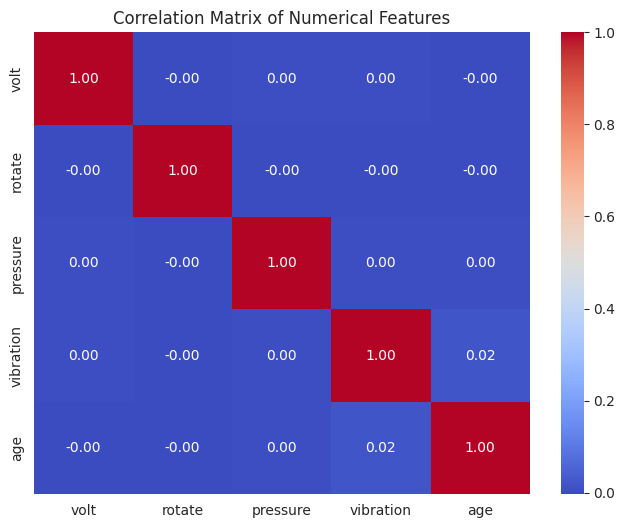

In [21]:
# Correlation matrix
# This step calculates the correlation between numerical features in the dataset.
# It helps to identify relationships between different features, which can be useful for feature selection
# and understanding the data.
# Select only the numerical columns for the correlation matrix
numerical_df = df[['volt', 'rotate', 'pressure', 'vibration', 'age']]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Conclusion

The correlation matrix shows that there is **virtually no linear correlation** between the numerical features in the dataset. All correlation coefficients are either `0.00` or very close to it (`0.02`), with the exception of the diagonal, which is always `1.00` as a variable is perfectly correlated with itself. This indicates that changes in one sensor reading (e.g., voltage) are not linearly related to changes in another (e.g., pressure) or to the machine's age. This is a positive finding for the model, as it means there is no **multicollinearity** among these features.

***

### What if the data had high correlations?

If the data showed high correlations (e.g., a correlation coefficient greater than 0.7 or 0.8), one would need to address the issue of **multicollinearity**. Multicollinearity occurs when independent variables in a regression model are highly correlated, which can make it difficult to determine the individual effect of each feature on the target variable. Here's what one could do:

1.  **Feature Selection:** The most common approach is to simply **remove one of the highly correlated features**. For example, if `voltage` and `pressure` were highly correlated, one would keep one and drop the other, as they essentially provide redundant information to the model.
2.  **Dimensionality Reduction:** Techniques like **Principal Component Analysis (PCA)** can be used to transform a set of correlated variables into a smaller set of uncorrelated variables called principal components. This method retains the information from the original features while eliminating multicollinearity.
3.  **Regularization:** In regression models, one can use **regularization techniques** like Lasso or Ridge regression. These methods add a penalty to the model for having too many features, which helps to mitigate the effects of multicollinearity.

For the specific project, since tree-based models like XGBoost and Random Forest are being used, high correlations are generally **not a major concern**. Tree-based models can handle multicollinearity much better than linear models because they make decisions based on single features at a time rather than on a linear combination of features.

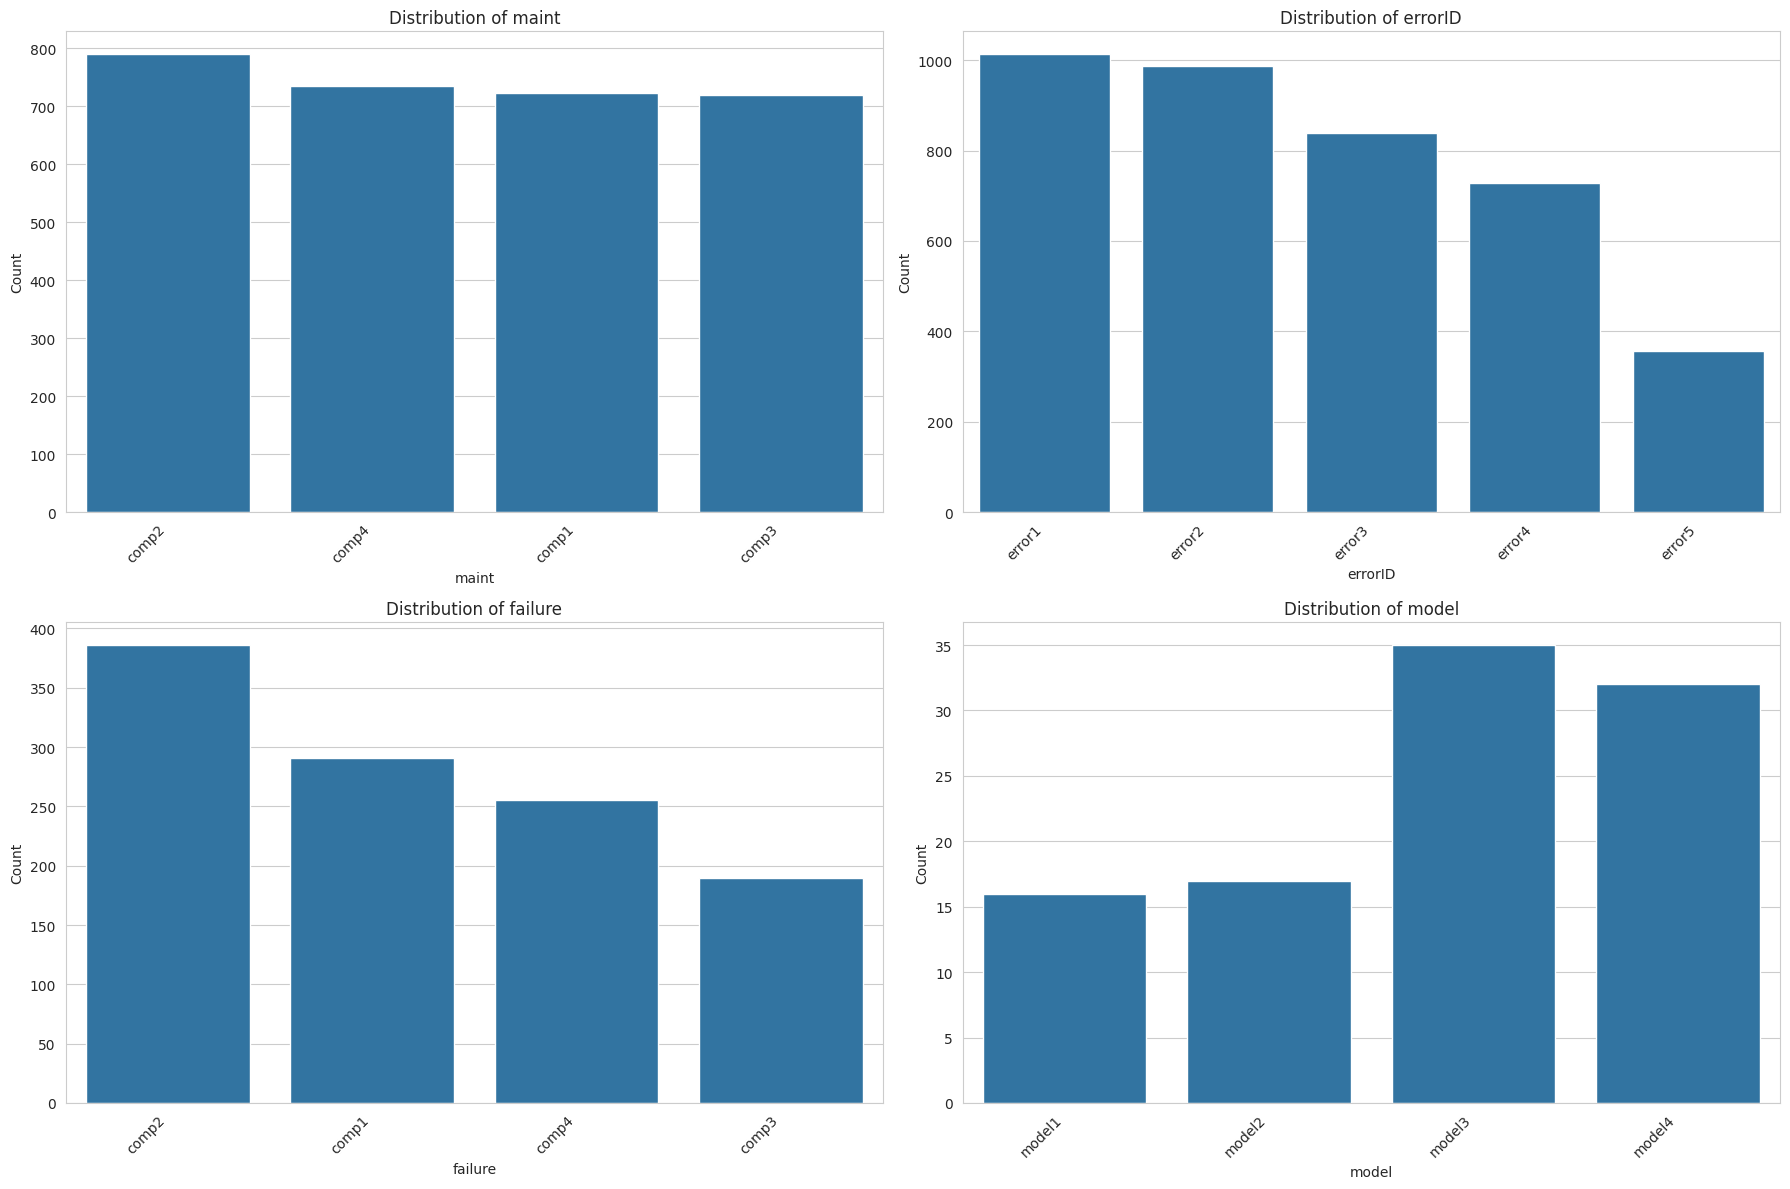

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns
categorical_cols = ['maint', 'errorID', 'failure','model']

# Set up the plotting style
plt.figure(figsize=(18, 12))

# Plot a bar chart for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)

    # Filter for 'maint' and 'errorID' to exclude 'no_event' values
    if col in ['maint', 'errorID', 'failure']:
        filtered_df = df[df[col] != 0 ]
        if col == 'errorID':
            filtered_df = filtered_df[filtered_df[col] != 0]

        sns.countplot(data=filtered_df, x=col, order=filtered_df[col].value_counts().index)
    elif col == 'model':
        # For 'model', we count unique machines per model to avoid
        # counting every telemetry entry.
        model_counts = df.groupby('model')['machineID'].nunique().reset_index()
        model_counts.columns = ['model', 'count']
        sns.barplot(data=model_counts, x='model', y='count')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Conclusion

The bar plot for the `failure` variable reveals a key characteristic of the dataset: it is **highly imbalanced**. The plot shows the distribution of different failure types (`comp1`, `comp2`, `comp3`, etc.), but these numbers are very low when compared to the total number of observations in a full dataset. This is a classic case of **class imbalance**, where one class (the failures) is a small minority compared to the other (no failures).

This imbalance has significant implications for machine learning models. A model trained on this data might achieve very high **accuracy** by simply predicting the majority class ("no failure") for every observation. However, its ability to correctly identify the rare "failure" events would be poor, leading to low **recall**. For a predictive maintenance system, correctly identifying a failure is far more important than a high overall accuracy score.

---

##### **`maint` (Maintenance Events)**
The distribution of maintenance types is relatively balanced. This is a positive finding, as it indicates that the machines receive various types of maintenance, which could be an important feature for the model.

##### **`errorID` (Error Events)**
The error events are not perfectly balanced but show a meaningful distribution. `error1` is the most common, while `error5` is the least common. This distribution provides valuable information for the model to learn which types of errors are more frequent and potentially more predictive of future failures.

##### **`model` (Machine Models)**
The number of machines for each model is also imbalanced. **Model 3** and **Model 4** are the most common in the fleet, while **Model 1** and **Model 2** are less frequent. The model should learn to account for this imbalance, as the behavior of certain models might be more representative of the overall fleet.

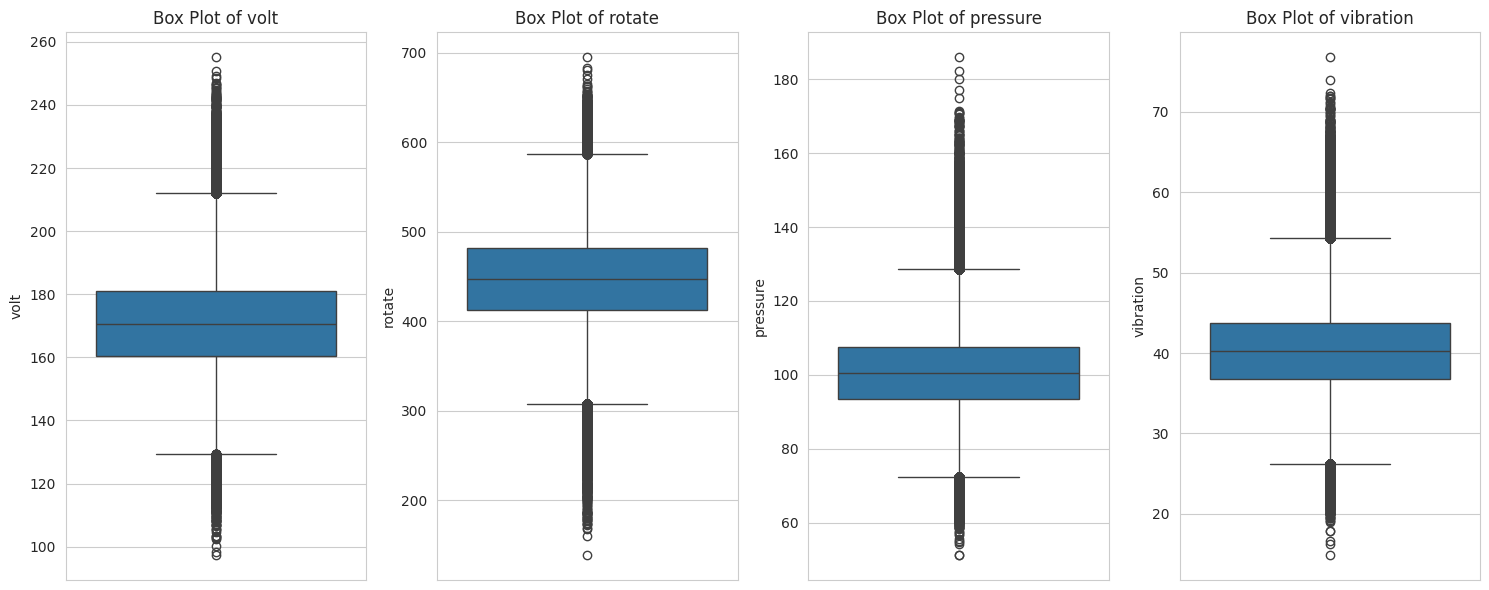

In [23]:
# Select numerical columns for outlier analysis
numerical_cols = ['volt', 'rotate', 'pressure', 'vibration']

# Set up the plotting style
plt.figure(figsize=(15, 6))

# Create a box plot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### Conclusion

Based on the box plots, all four telemetry features (`volt`, `rotate`, `pressure`, and `vibration`) contain **outliers**. The box plots show individual points (circles) that fall outside the "whiskers" of the main box, indicating values that are significantly different from the rest of the data.

These outliers are not necessarily a problem; they could represent extreme but valid sensor readings, perhaps signaling a machine under stress just before a failure. Therefore, simply removing them might lead to a loss of valuable information.

---

#### What to do with outliers

When data contains outliers, here are a few common approaches:

1.  **Do nothing:** The first step is to consider the context. Since these outliers might be critical indicators of an impending failure in a predictive maintenance context, it may be best **not to remove them**. Tree-based models like Random Forest and XGBoost are robust to outliers and can handle them without issue.
2.  **Transform the data:** If a model is sensitive to outliers (e.g., linear regression), you could apply a **log or square root transformation** to compress the scale and reduce the influence of extreme values. This can make the data's distribution more "normal-like."
3.  **Use robust methods:** Employ **robust scaling techniques** that use the median and interquartile range (IQR) instead of the mean and standard deviation. This minimizes the effect of outliers on the scaling process.
4.  **Winsorizing:** This method caps the extreme values at a certain percentile (e.g., 5th and 95th percentiles). Instead of removing the outliers, it brings them back into the range of the main data distribution.
5.  **Remove outliers:** As a last resort, you can remove the outliers if they are clearly the result of a measurement error or are not representative of the underlying process. However, this should only be done with strong justification.

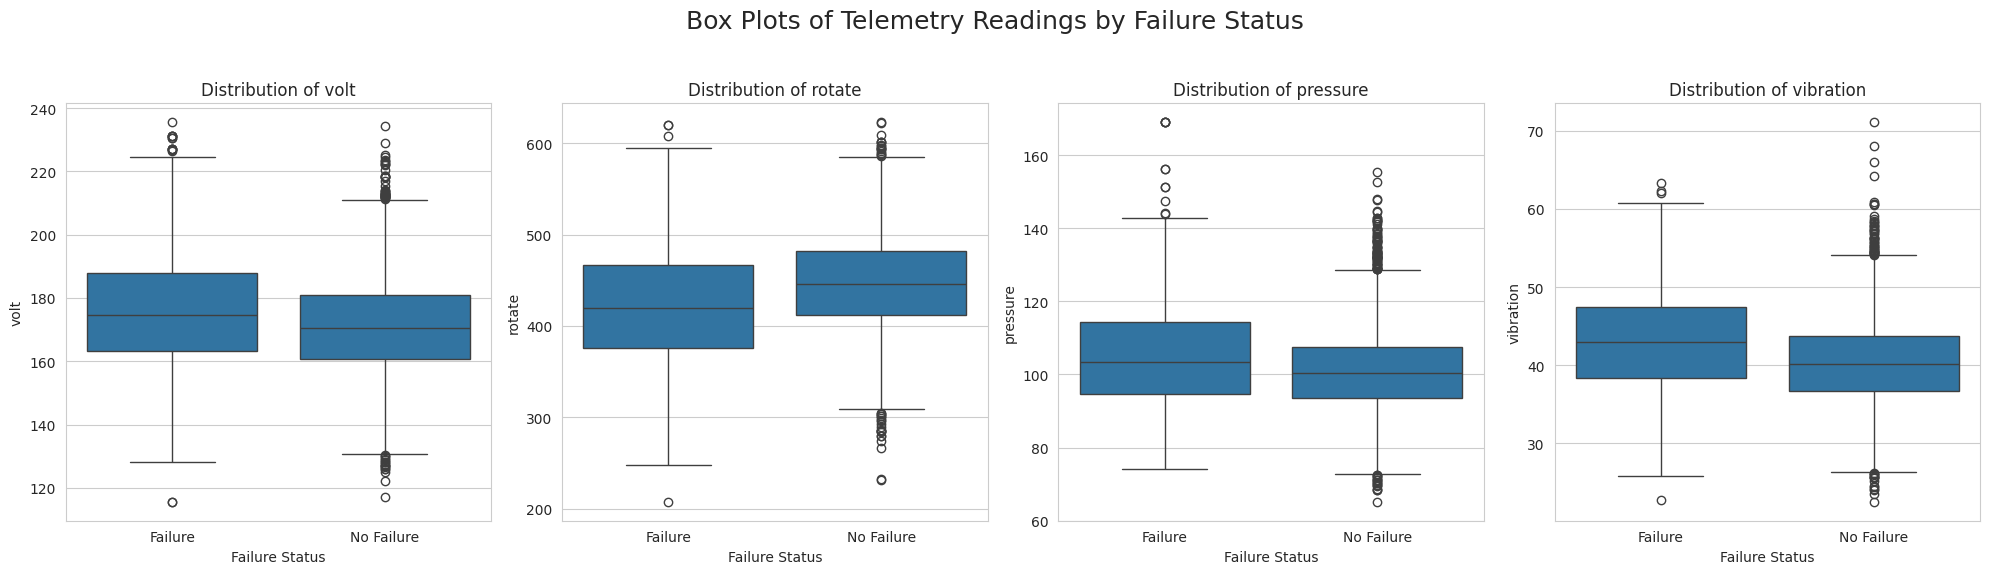

In [24]:
# Split the data into failure and no-failure samples
df_failures = df[df['failure'] != 0].copy()
df_no_failures = df[df['failure'] == 0].sample(n=len(df_failures) * 5, random_state=42).copy()

# Combine the two dataframes for plotting
df_sampled = pd.concat([df_failures, df_no_failures])

# Replace numeric values with descriptive strings for plotting
# Assuming component failures are represented by 1, 2, 3, 4
df_sampled['failure_status'] = df_sampled['failure'].apply(lambda x: 'Failure' if x != 0 else 'No Failure')

# List of telemetry features to plot
telemetry_features = ['volt', 'rotate', 'pressure', 'vibration']

# Set up the subplots
fig, axes = plt.subplots(1, len(telemetry_features), figsize=(20, 6))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle('Box Plots of Telemetry Readings by Failure Status', fontsize=18)

# Create a box plot for each feature
for i, feature in enumerate(telemetry_features):
    sns.boxplot(x='failure_status', y=feature, data=df_sampled, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('Failure Status')
    axes[i].set_ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Conclusion from Box Plots

The box plots provide the most significant insights into the relationship between telemetry data and failures. The plots reveal a clear and distinct difference in the distribution of sensor readings between machines that experienced a failure and those that did not.

* **`volt`:** The median voltage for machines that failed is slightly higher than for those that did not.
* **`rotate` & `vibration`:** The median rotation and vibration speeds for non-failing machines are noticeably higher than for failing machines.
* **`pressure`:** The median pressure is higher for failing machines.

The differences in the medians and the overall distribution for each feature strongly suggest that the **telemetry readings are predictive indicators of future failures**. These patterns indicate that the performance of the machine changes in a measurable way before a failure event. This confirms that a model can learn from these features to predict a failure.

---

#### What to do with the findings

The findings from these box plots are crucial for the next step: **Feature Engineering**. While the raw values themselves are predictive, creating new features that capture trends over time will likely improve the model's performance even further. For example, a rolling average of a feature might capture a slow decline in performance that a single reading cannot.

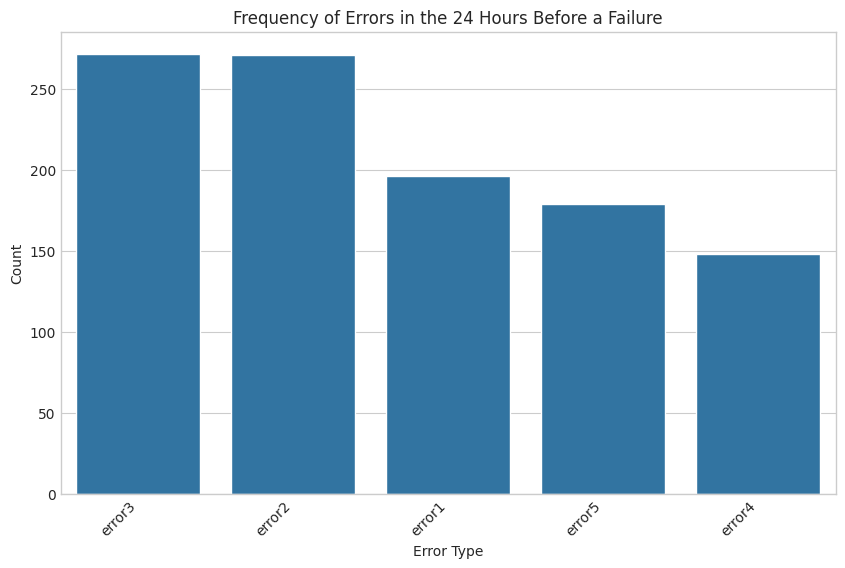

In [25]:
# Define the look-back window (e.g., 24 hours)
look_back_window = timedelta(hours=24)

# 1. Prepare failure and error dataframes
# Drop duplicates from failures to get one entry per failure event
df_failures = df[df['failure'] != 0].drop_duplicates(subset=['machineID', 'datetime']).copy()
df_errors = df[df['errorID'] != 0].copy()

# 2. Add time windows to the failures dataframe
# These new columns are used for vectorized comparison later
df_failures['failure_time'] = df_failures['datetime']
df_failures['time_window_start'] = df_failures['failure_time'] - look_back_window

# 3. Merge failures and errors on machineID
# This creates a combined table with all errors and all failure events for each machine
merged_df = pd.merge(df_errors, df_failures, on='machineID', how='inner', suffixes=('_error', '_failure'))

# 4. Vectorized Filtering
errors_before_failure = merged_df[
    (merged_df['datetime_error'] >= merged_df['time_window_start']) &
    (merged_df['datetime_error'] < merged_df['datetime_failure'])
]

# 5. Plot the result
if not errors_before_failure.empty:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='errorID_error', data=errors_before_failure, order=errors_before_failure['errorID_error'].value_counts().index)
    plt.title(f'Frequency of Errors in the {look_back_window.total_seconds()/3600:.0f} Hours Before a Failure')
    plt.xlabel('Error Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print(f"No errors found in the {look_back_window.total_seconds()/3600:.0f} hour window before any failure.")

#### Conclusion from the Plot

The bar plot showing the frequency of errors in the 24 hours before a failure is highly insightful. It reveals a strong, direct relationship between specific error types and a subsequent machine failure.

* **Error Dominance:** The plot shows that `error3` and `error2` are by far the most frequent errors occurring in the 24-hour window before a failure. `error1` is also common, but significantly less so than `error3` and `error2`.
* **Predictive Power:** This pattern strongly suggests that `error3` and `error2` are **leading indicators of a machine failure**. The presence of these errors increases the likelihood of an imminent failure.

The conclusion is that these error types are not random noise; they are key predictive features. When building a machine learning model, you must use this information.

---

#### What to do with the findings

Based on this finding, your **feature engineering** should focus on creating features that quantify these error events. Key features to add would be:

* **Lagged Error Indicators:** Create a binary feature (`did_error3_occur_in_last_24h`).
* **Error Count:** Create a numerical feature for the number of `error3` and `error2` events in a specific time window.
* **Time Since Last Error:** A feature that measures the time elapsed since the last `error3` or `error2` event.

These engineered features will provide your model with the clear, direct signals it needs to accurately predict future failures.

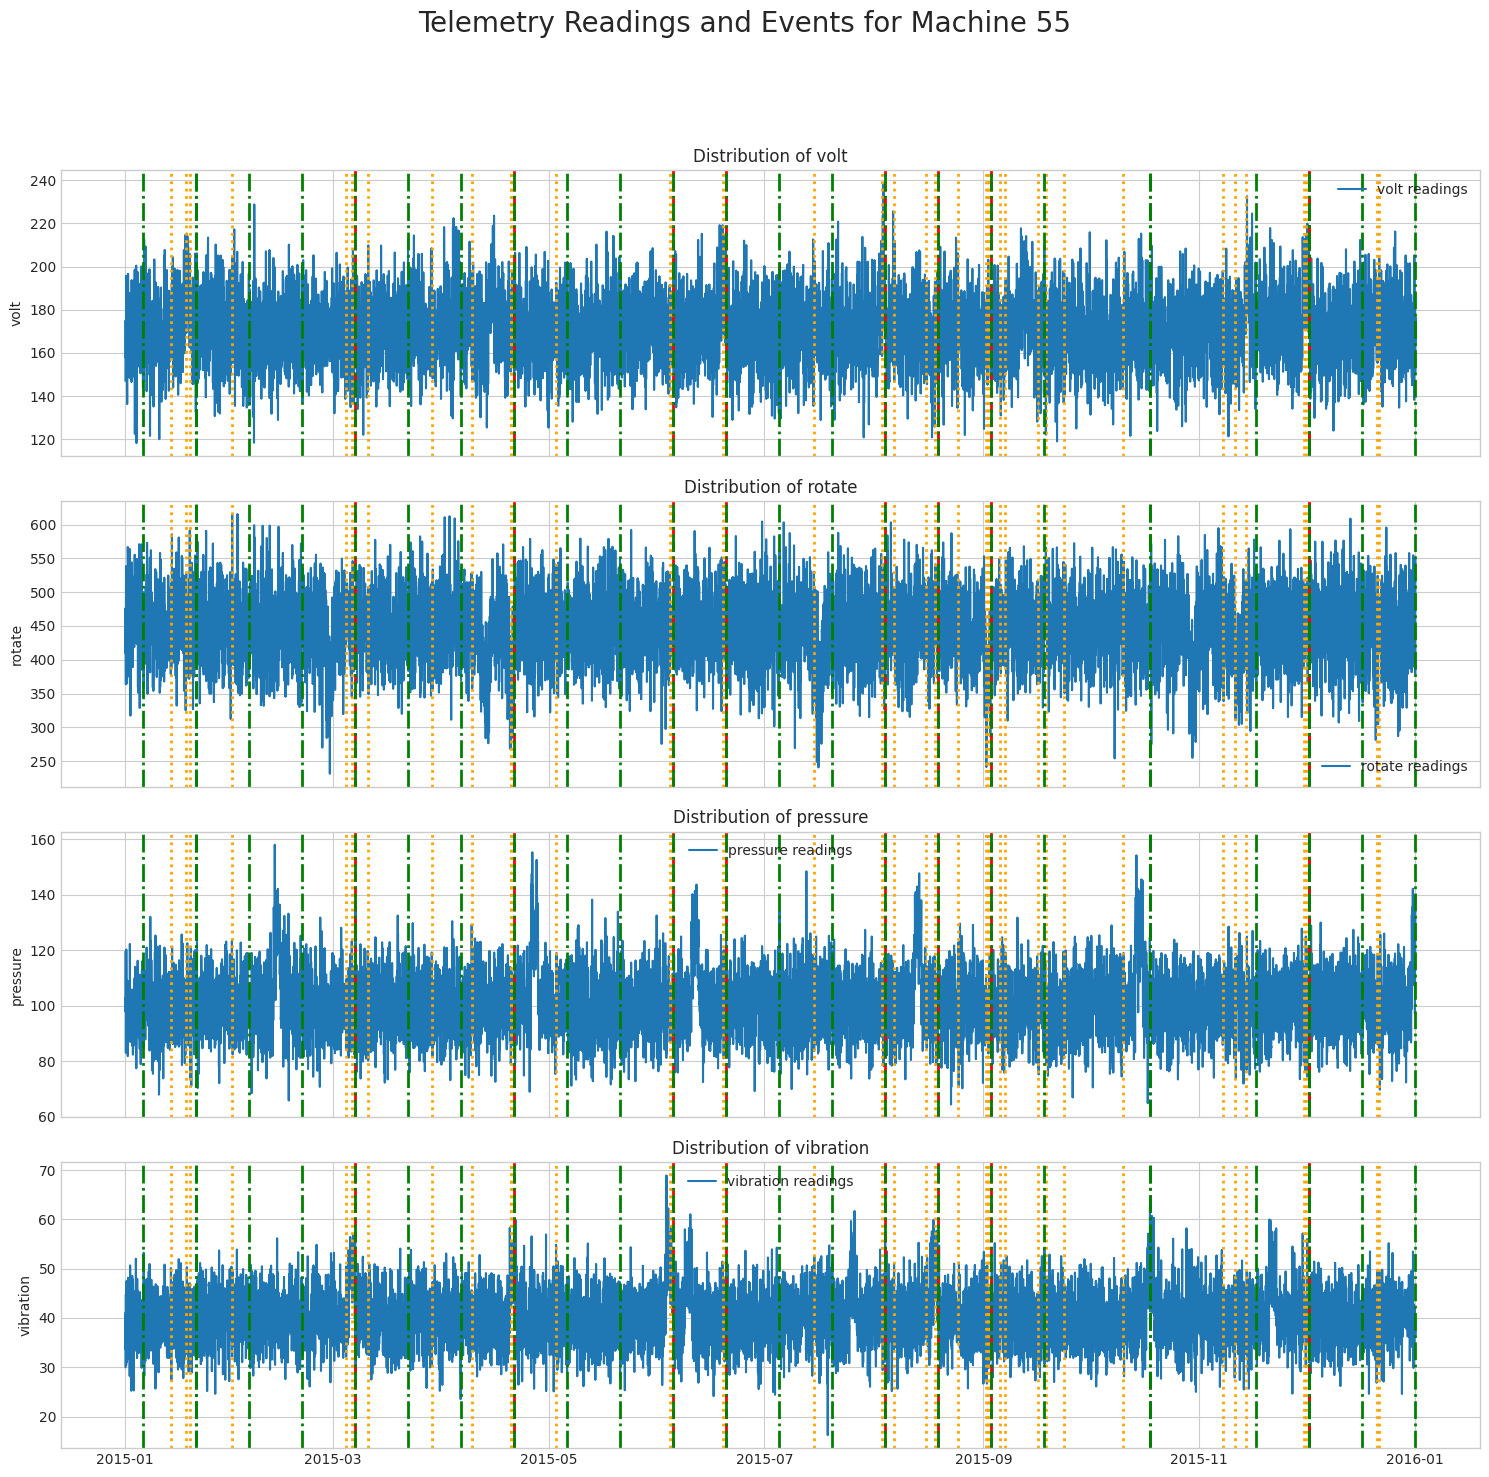

In [26]:
# Select one random machine ID to visualize
random_machine_id = np.random.choice(df['machineID'].unique(), 1)[0]
df_machine = df[df['machineID'] == random_machine_id].set_index('datetime')

# Create a filtered dataframe for failures, errors, and maintenance
df_failures_filtered = df_machine[df_machine['failure'] != 0]
df_errors_filtered = df_machine[df_machine['errorID'] != 0]
df_maint_filtered = df_machine[df_machine['maint'] != 0]

# List of telemetry features to plot
telemetry_features = ['volt', 'rotate', 'pressure', 'vibration']

# Set up the subplots
fig, axes = plt.subplots(len(telemetry_features), 1, figsize=(15, 16), sharex=True)
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle(f'Telemetry Readings and Events for Machine {random_machine_id}', fontsize=20, y=0.95)

# Plot each telemetry feature with overlaid events
for i, feature in enumerate(telemetry_features):
    ax = axes[i]

    # Plot the telemetry line plot
    sns.lineplot(data=df_machine, x=df_machine.index, y=feature, ax=ax, label=f'{feature} readings')

    # Add vertical lines for each event type
    if not df_failures_filtered.empty:
        for failure_time in df_failures_filtered.index:
            ax.axvline(x=failure_time, color='red', linestyle='--', label='_Failure_' if failure_time == df_failures_filtered.index[0] else "", linewidth=2)

    if not df_errors_filtered.empty:
        for error_time in df_errors_filtered.index:
            ax.axvline(x=error_time, color='orange', linestyle=':', label='_Error_' if error_time == df_errors_filtered.index[0] else "", linewidth=2)

    if not df_maint_filtered.empty:
        for maint_time in df_maint_filtered.index:
            ax.axvline(x=maint_time, color='green', linestyle='-.', label='_Maintenance_' if maint_time == df_maint_filtered.index[0] else "", linewidth=2)

    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

#### Conclusion from the Time-Series Plot

The time-series plot is **not very insightful** on its own. There is **no obvious visual pattern** where the raw sensor values spike or drop consistently right before a failure or maintenance event. The events (vertical lines) appear to occur randomly within the noisy sensor data.

The main conclusion is that the **raw sensor data alone is insufficient** to make a prediction. The information the model needs is not in the individual data points but in the **patterns and trends over time**.

***

#### What to do with the findings

To extract meaningful features for the model, **feature engineering** is the critical next step. You need to create new columns that capture the dynamics of the sensor data and the temporal proximity to other events.

Here are the key features to create:

* **Time-Based Counters:**
    * **Time since last maintenance event** (`maint_comp_id`).
    * **Number of errors of each type** in the last 24 hours, 3 days, or 7 days.
    * **Time since last error** (`errorID`).
    These features help the model assess the risk of a failure based on recent history.

* **Rolling-Window Features:**
    * **Rolling average** (`rolling mean`).
    * **Rolling standard deviation** (`rolling std`).
    * **Rolling min and max values** (`rolling min/max`).
    Calculate these statistics for the telemetry data (`volt`, `rotate`, etc.) over a specific time window (e.g., the last 3 hours, 24 hours, or 3 days). These features smooth out noise and capture trends that may indicate deteriorating performance.

 ## ⚙️ Feature Engineering:

This notebook section contains two key functions for feature engineering: `generate_rolling_features` and `generate_event_features`. These functions transform raw machine data (telemetry, errors, and maintenance) into a format suitable for a predictive maintenance model.

---

### 1. `generate_rolling_features`

This function is responsible for creating **rolling-window features** from the telemetry data (e.g., voltage, rotation, pressure, vibration).

#### **What it does:**
It calculates the **mean** and **standard deviation** of each telemetry feature over specified time windows (e.g., the last 24 and 72 hours). This process creates a dynamic profile of each machine's behavior over time.

- **`rolling()`:** This Pandas method is used to create the rolling windows. By setting `on='datetime'`, it correctly uses time-based windows, regardless of the number of rows.
- **`groupby('machineID')`:** This ensures that the calculations are performed separately for each machine, preventing data from one machine from "leaking" into the calculations for another.
- **`shift(1)`:** After creating the features, they are shifted forward by one time step. This is a crucial step to **prevent data leakage**, ensuring that our model's predictions for a given timestamp are based only on data from *before* that timestamp.

#### **Why it's important:**
Raw telemetry data is often noisy and difficult to interpret directly. By calculating rolling statistics, we capture the machine's **trends and volatility**. For example, a sudden increase in the standard deviation of vibration might be a stronger indicator of an impending failure than the raw vibration value itself.

---

### 2. `generate_event_features`

This function creates event-based features from the `error` and `maintenance` logs.

#### **What it does:**
It calculates two types of features that capture event history:

- **Time since last event:** It calculates the number of hours that have passed since the last maintenance (`time_since_last_maint`), the last error (`time_since_last_error`) and the last failure (`time_since_last_failure`).
- **Rolling event count:** It counts the number of each specific error type that has occurred within the last 24 and 72 hours. This is achieved by creating **dummy variables** for each `errorID` and then using a rolling sum (`rolling().sum()`) on those new columns.

#### **Why it's important:**
Discrete events like errors and maintenance are key predictors of machine failure.

- **`time_since_last_maint`**: Knowing the time since the last maintenance can be a strong predictor of wear and tear. A machine is more likely to fail as more time passes since its last service.
- **`rolling_error_...`**: A sudden increase in error frequency, even for minor errors, can signal an underlying problem. This rolling count provides a powerful signal of deteriorating health, which a simple error count might miss.

By combining the outputs of these two functions, the final dataset contains a rich set of time-based and event-based features that provide a comprehensive view of each machine's operational history, making it ready for a machine learning model.

In [27]:
def generate_rolling_features(df, telemetry_features, window_sizes_hours=[24, 72]):
    """
    Generates rolling-window features for telemetry data, handling duplicate timestamps.

    Args:
        df (pd.DataFrame): DataFrame with 'machineID', 'datetime', and telemetry features.
        telemetry_features (list): List of telemetry feature column names.
        window_sizes_hours (list): List of time window sizes in hours.

    Returns:
        pd.DataFrame: The DataFrame with new rolling features.
    """
    df = df.copy()
    df['datetime'] = pd.to_datetime(df['datetime'])
    # --- Create cyclical features ---
    df['hour_of_day'] = df['datetime'].dt.hour
    # Day of the week (0=Monday, 6=Sunday)
    df['day_of_week'] = df['datetime'].dt.weekday


    # --- Create lag features ---
    for feature in telemetry_features:
        # A simple lag of 2 hours
        df[f'{feature}_lag_2h'] = df.groupby('machineID')[feature].shift(2)
        # Difference lag of 2 hours
        df[f'{feature}_diff_lag_2h'] = df[feature] - df[f'{feature}_lag_2h']

    # 1. Aggregate to a unique (machineID, datetime) level for rolling calculation
    # We take the mean here, assuming telemetry values might differ slightly.
    df_agg = df.groupby(['machineID', 'datetime'])[telemetry_features].mean().reset_index()
    df_agg = df_agg.sort_values(by=['machineID', 'datetime'])

    # 2. Apply rolling to the aggregated DataFrame and store results in a new DataFrame
    rolling_results = pd.DataFrame()
    for window in window_sizes_hours:
        rolling_window_str = f'{window}h'

        # Apply rolling on the grouped DataFrame
        rolling_df = df_agg.groupby('machineID').rolling(rolling_window_str, on='datetime')

        for feature in telemetry_features:
            rolling_results[f'{feature}_mean_{window}h'] = rolling_df[feature].mean().values
            rolling_results[f'{feature}_std_{window}h'] = rolling_df[feature].std().values

    # Add machineID and datetime back to rolling_results for merging
    rolling_results[['machineID', 'datetime']] = df_agg[['machineID', 'datetime']]

    # 3. Shift the new features to prevent data leakage
    new_cols = [col for col in rolling_results.columns if '_mean_' in col or '_std_' in col]
    for col in new_cols:
        rolling_results[col] = rolling_results.groupby('machineID')[col].shift(1)

    # 4. Merge the new features back into the original DataFrame
    # Use a left merge to keep all original rows
    df_final = pd.merge(df, rolling_results, on=['machineID', 'datetime'], how='left')

    return df_final

In [28]:
def generate_event_features(df, window_sizes_hours=[24, 72]):
    """
    Generates time-based and event count features from event data.

    Args:
        df (pd.DataFrame): DataFrame with 'machineID', 'datetime', and event features.
        window_sizes_hours (list): List of time window sizes in hours.

    Returns:
        pd.DataFrame: The DataFrame with new event-based features.
    """
    df = df.copy()

    # Ensure a clean index, as this is a property of the input DataFrame
    df = df.reset_index(drop=True)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.sort_values(by=['machineID', 'datetime'])

    # --- Time Since Last Event ---
    df['last_maint_time'] = pd.NaT
    df.loc[df['maint'] != 0, 'last_maint_time'] = df['datetime']
    df['last_maint_time'] = df.groupby('machineID')['last_maint_time'].ffill()
    df['time_since_last_maint'] = (df['datetime'] - df['last_maint_time']).dt.total_seconds() / 3600

    df['last_error_time'] = pd.NaT
    df.loc[df['errorID'] != 0, 'last_error_time'] = df['datetime']
    df['last_error_time'] = df.groupby('machineID')['last_error_time'].ffill()
    df['time_since_last_error'] = (df['datetime'] - df['last_error_time']).dt.total_seconds() / 3600

    df['last_failure_time'] = pd.NaT
    df.loc[df['failure'] != 0, 'last_failure_time'] = df['datetime']
    df['last_failure_time'] = df.groupby('machineID')['last_failure_time'].ffill()
    df['time_since_last_failure'] = (df['datetime'] - df['last_failure_time']).dt.total_seconds() / 3600

    # --- Error Counts in a Time Window ---
    print("Generating error count features...")

    df_dummies = pd.get_dummies(df[['machineID', 'datetime', 'errorID']], columns=['errorID'], prefix='error')
    dummy_cols = [col for col in df_dummies.columns if col.startswith('error_')]
    df_agg = df_dummies.groupby(['machineID', 'datetime'])[dummy_cols].sum().reset_index()

    # Dynamically calculate rolling sums in a loop
    rolling_dfs = []
    for window in window_sizes_hours:
        window_str = f'{window}h'
        temp_df = df_agg.groupby('machineID').rolling(window_str, on='datetime')[dummy_cols].sum().reset_index()
        temp_df = temp_df.rename(columns={col: f'rolling_{col}_{window}h' for col in dummy_cols})
        rolling_dfs.append(temp_df)

    # Combine all rolling results into a single DataFrame
    rolling_results = rolling_dfs[0]
    for i in range(1, len(rolling_dfs)):
        rolling_results = pd.merge(rolling_results, rolling_dfs[i], on=['machineID', 'datetime'], how='left')

    # Merge the new features back into the original DataFrame
    df_final = pd.merge(df, rolling_results, on=['machineID', 'datetime'], how='left')

    # Shift all new features to prevent data leakage
    new_cols = [col for col in df_final.columns if 'time_since' in col or 'rolling_' in col]
    for col in new_cols:
        df_final[col] = df_final.groupby('machineID')[col].shift(1)

    return df_final

In [29]:
telemetry_features_list = ['volt', 'rotate', 'pressure', 'vibration']
window_sizes = [3, 12, 24, 72]

# Create the first set of features
df_with_rolling_features = generate_rolling_features(df, telemetry_features_list, window_sizes)

# Add the second set of features
df_final = generate_event_features(df_with_rolling_features, window_sizes)

# Display the final DataFrame with all features
print(df_final.head())

Generating error count features...
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration errorID maint   model  age  ... rolling_error_error2_24h  \
0  45.087686       0     0  model3   18  ...                      NaN   
1  43.413973       0     0  model3   18  ...                      0.0   
2  34.178847       0     0  model3   18  ...                      0.0   
3  41.122144       0     0  model3   18  ...                      0.0   
4  25.990511       0     0  model3   18  ...                      0.0   

   rolling_error_error3_24h  rolling_error_error4_24h  \
0                       NaN         

In [30]:
df_final.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration',
       'errorID', 'maint', 'model', 'age', 'failure', 'hour_of_day',
       'day_of_week', 'volt_lag_2h', 'volt_diff_lag_2h', 'rotate_lag_2h',
       'rotate_diff_lag_2h', 'pressure_lag_2h', 'pressure_diff_lag_2h',
       'vibration_lag_2h', 'vibration_diff_lag_2h', 'volt_mean_3h',
       'volt_std_3h', 'rotate_mean_3h', 'rotate_std_3h', 'pressure_mean_3h',
       'pressure_std_3h', 'vibration_mean_3h', 'vibration_std_3h',
       'volt_mean_12h', 'volt_std_12h', 'rotate_mean_12h', 'rotate_std_12h',
       'pressure_mean_12h', 'pressure_std_12h', 'vibration_mean_12h',
       'vibration_std_12h', 'volt_mean_24h', 'volt_std_24h', 'rotate_mean_24h',
       'rotate_std_24h', 'pressure_mean_24h', 'pressure_std_24h',
       'vibration_mean_24h', 'vibration_std_24h', 'volt_mean_72h',
       'volt_std_72h', 'rotate_mean_72h', 'rotate_std_72h',
       'pressure_mean_72h', 'pressure_std_72h', 'vibration_mean_72h',
       '

#### Why are unnecessary columns dropped?

All columns that are not directly used as features for the machine learning model are dropped to ensure a clean, efficient, and accurate training process. This is done for two main categories of columns:

* **Raw Features (`errorID`, `maint`, `failure`):** These columns contain the raw event data. They are removed for two primary reasons:
    * **Redundancy:** The information from these raw features has been transformed into more useful, aggregated features like `time_since_last_...` and `rolling_error_...`. The new features are much more predictive.

* **Intermediate Columns (`last_maint_time`, `last_error_time`, etc.):** These columns were temporary variables created during the feature engineering process. Their purpose was simply to help calculate the final, numerical features.
    * **Format:** They are typically timestamps, which are not in a format that a machine learning model can directly use as a feature.
    * **Efficiency:** The final, cleaned dataset should contain only the most valuable information. Removing these temporary columns reduces the dataset's size and improves model training speed and performance.

In [31]:
# List of raw features to drop
# These features are either raw event data or intermediate columns that are not needed in the final model
# They are not useful for training the model and may lead to data leakage or redundancy.
raw_features_to_drop = [
    'errorID',
    'maint',
    'last_maint_time',
    'last_error_time',
    'last_failure_time'

]
# Remove columns from the final DataFrame
# 'failure' is the label for training and should not be removed
# Add raw telemetry feature names to the drop list
raw_features_to_drop += ['volt', 'rotate', 'pressure', 'vibration']
df_final = df_final.drop(columns=raw_features_to_drop, errors='ignore')
df_final.columns


Index(['datetime', 'machineID', 'model', 'age', 'failure', 'hour_of_day',
       'day_of_week', 'volt_lag_2h', 'volt_diff_lag_2h', 'rotate_lag_2h',
       'rotate_diff_lag_2h', 'pressure_lag_2h', 'pressure_diff_lag_2h',
       'vibration_lag_2h', 'vibration_diff_lag_2h', 'volt_mean_3h',
       'volt_std_3h', 'rotate_mean_3h', 'rotate_std_3h', 'pressure_mean_3h',
       'pressure_std_3h', 'vibration_mean_3h', 'vibration_std_3h',
       'volt_mean_12h', 'volt_std_12h', 'rotate_mean_12h', 'rotate_std_12h',
       'pressure_mean_12h', 'pressure_std_12h', 'vibration_mean_12h',
       'vibration_std_12h', 'volt_mean_24h', 'volt_std_24h', 'rotate_mean_24h',
       'rotate_std_24h', 'pressure_mean_24h', 'pressure_std_24h',
       'vibration_mean_24h', 'vibration_std_24h', 'volt_mean_72h',
       'volt_std_72h', 'rotate_mean_72h', 'rotate_std_72h',
       'pressure_mean_72h', 'pressure_std_72h', 'vibration_mean_72h',
       'vibration_std_72h', 'time_since_last_maint', 'time_since_last_error',


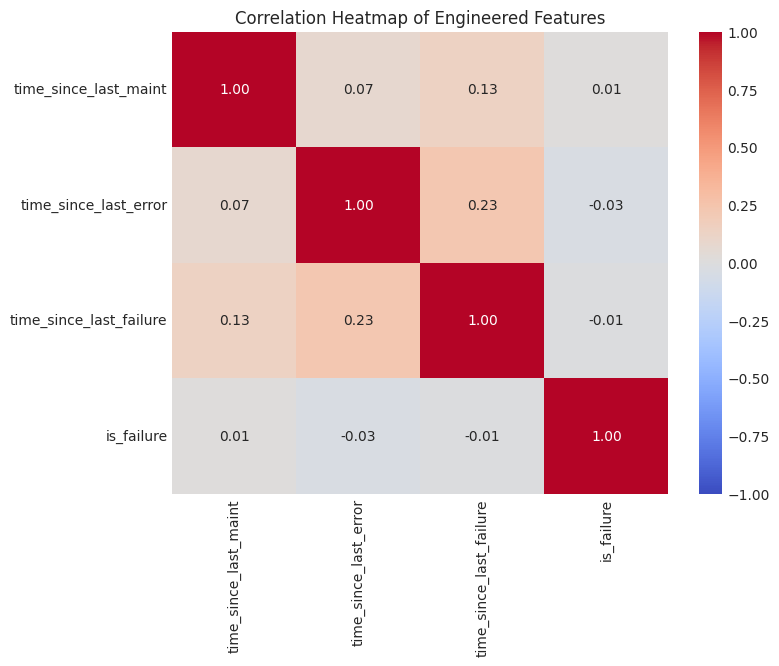

In [32]:
# Select the relevant columns (only numerical and the target variable)
# Adjust the list of features to your new column names
feature_columns = [col for col in df_final.columns if 'time_since' in col]
target_column = ['is_failure']

# Ensure 'failure' is a numerical type (if not already)
df_final['is_failure'] = np.where(df_final['failure'] != 0, 1.0, 0.0)

# Calculate the correlation matrix
correlation_matrix = df_final[feature_columns + target_column].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Engineered Features')
plt.show()

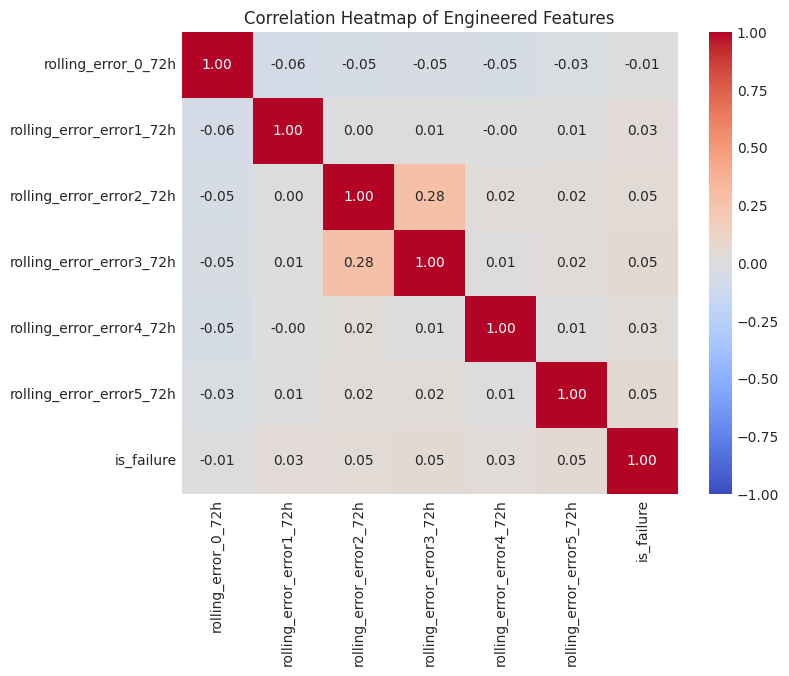

In [33]:
# Select the relevant columns (only numerical and the target variable)
# Adjust the list of features to your new column names
feature_columns = [col for col in df_final.columns if 'rolling' in col and '72h' in col]
target_column = ['is_failure']

# Ensure 'failure' is a numerical type (if not already)
df_final['is_failure'] = np.where(df_final['failure'] != 0, 1.0, 0.0)

# Calculate the correlation matrix
correlation_matrix = df_final[feature_columns + target_column].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Engineered Features')
plt.show()

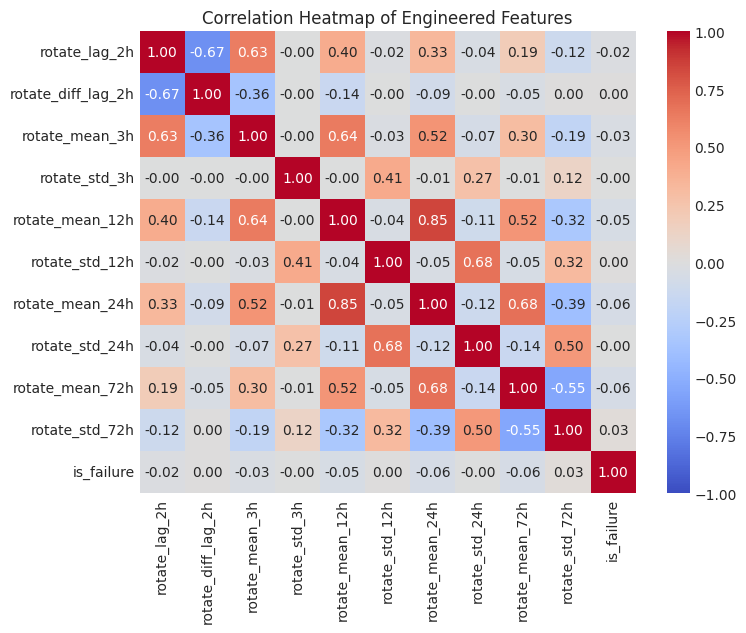

In [34]:
# Select the relevant columns (only numerical and the target variable)
# Adjust the list of features to your new column names
feature_columns = [col for col in df_final.columns if 'rotate' in col]
target_column = ['is_failure']

# Ensure 'failure' is a numerical type (if not already)
df_final['is_failure'] = np.where(df_final['failure'] != 0, 1.0, 0.0)

# Calculate the correlation matrix
correlation_matrix = df_final[feature_columns + target_column].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Engineered Features')
plt.show()

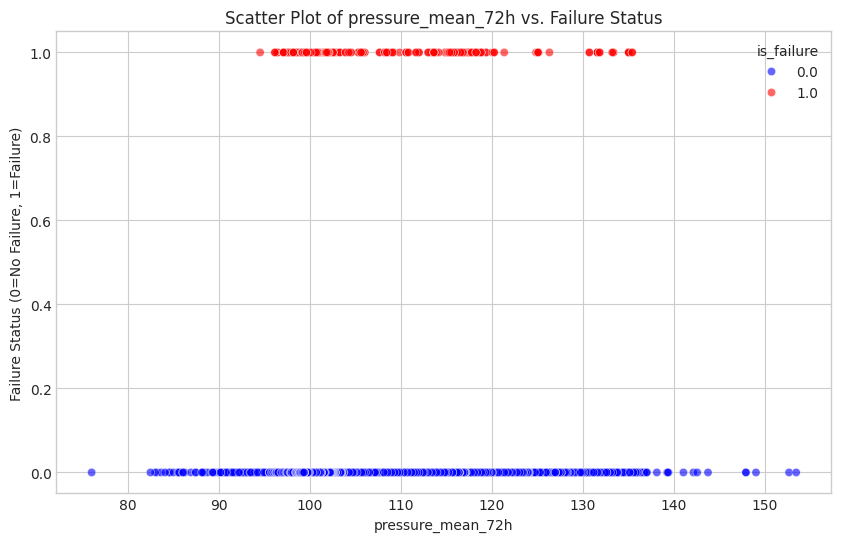

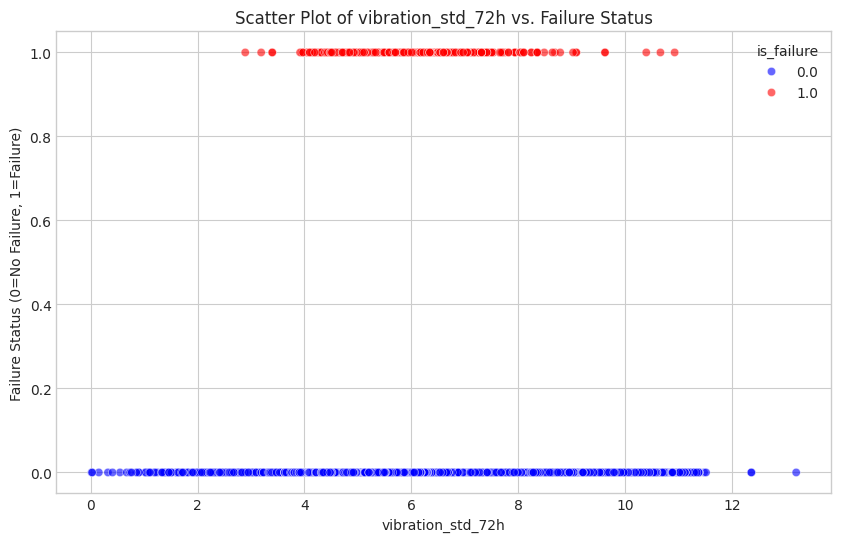

In [35]:
# Select the feature to plot
feature_to_plot = 'pressure_mean_72h'

plt.figure(figsize=(10, 6))
# 'hue' colors the points based on the 'is_failure' variable
sns.scatterplot(
    x=feature_to_plot,
    y='is_failure',
    data=df_final,
    hue='is_failure',
    palette=['blue', 'red'],
    alpha=0.6,
)

plt.title(f'Scatter Plot of {feature_to_plot} vs. Failure Status')
plt.xlabel(feature_to_plot)
plt.ylabel('Failure Status (0=No Failure, 1=Failure)')
plt.show()

# A second plot can also be created for a different feature, e.g., a standard deviation
feature_to_plot_2 = 'vibration_std_72h'

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=feature_to_plot_2,
    y='is_failure',
    data=df_final,
    hue='is_failure',
    palette=['blue', 'red'],
    alpha=0.6,
)

plt.title(f'Scatter Plot of {feature_to_plot_2} vs. Failure Status')
plt.xlabel(feature_to_plot_2)
plt.ylabel('Failure Status (0=No Failure, 1=Failure)')
plt.show()

In [36]:
df_final.columns

Index(['datetime', 'machineID', 'model', 'age', 'failure', 'hour_of_day',
       'day_of_week', 'volt_lag_2h', 'volt_diff_lag_2h', 'rotate_lag_2h',
       'rotate_diff_lag_2h', 'pressure_lag_2h', 'pressure_diff_lag_2h',
       'vibration_lag_2h', 'vibration_diff_lag_2h', 'volt_mean_3h',
       'volt_std_3h', 'rotate_mean_3h', 'rotate_std_3h', 'pressure_mean_3h',
       'pressure_std_3h', 'vibration_mean_3h', 'vibration_std_3h',
       'volt_mean_12h', 'volt_std_12h', 'rotate_mean_12h', 'rotate_std_12h',
       'pressure_mean_12h', 'pressure_std_12h', 'vibration_mean_12h',
       'vibration_std_12h', 'volt_mean_24h', 'volt_std_24h', 'rotate_mean_24h',
       'rotate_std_24h', 'pressure_mean_24h', 'pressure_std_24h',
       'vibration_mean_24h', 'vibration_std_24h', 'volt_mean_72h',
       'volt_std_72h', 'rotate_mean_72h', 'rotate_std_72h',
       'pressure_mean_72h', 'pressure_std_72h', 'vibration_mean_72h',
       'vibration_std_72h', 'time_since_last_maint', 'time_since_last_error',


/tmp/ipykernel_7090/3270089998.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_failure', y=feature_to_plot, data=df_final, palette='viridis')


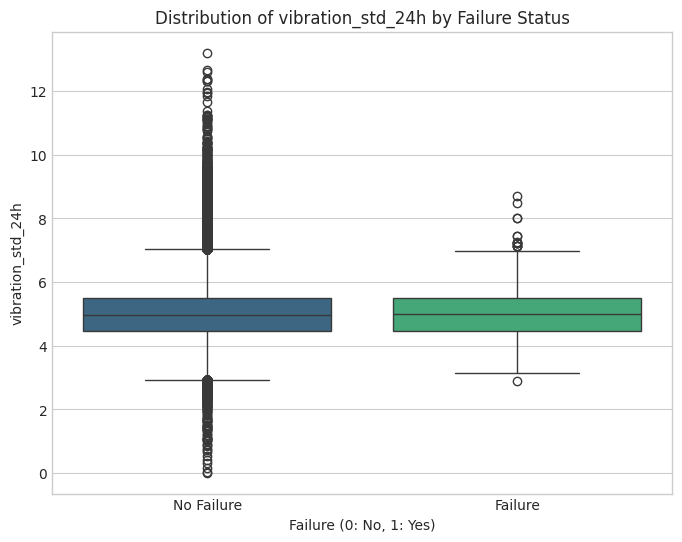

In [37]:
# Compare the distribution of a feature based on the 'failure' class
feature_to_plot = 'vibration_std_24h'

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_failure', y=feature_to_plot, data=df_final, palette='viridis')
plt.title(f'Distribution of {feature_to_plot} by Failure Status')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel(feature_to_plot)
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.show()

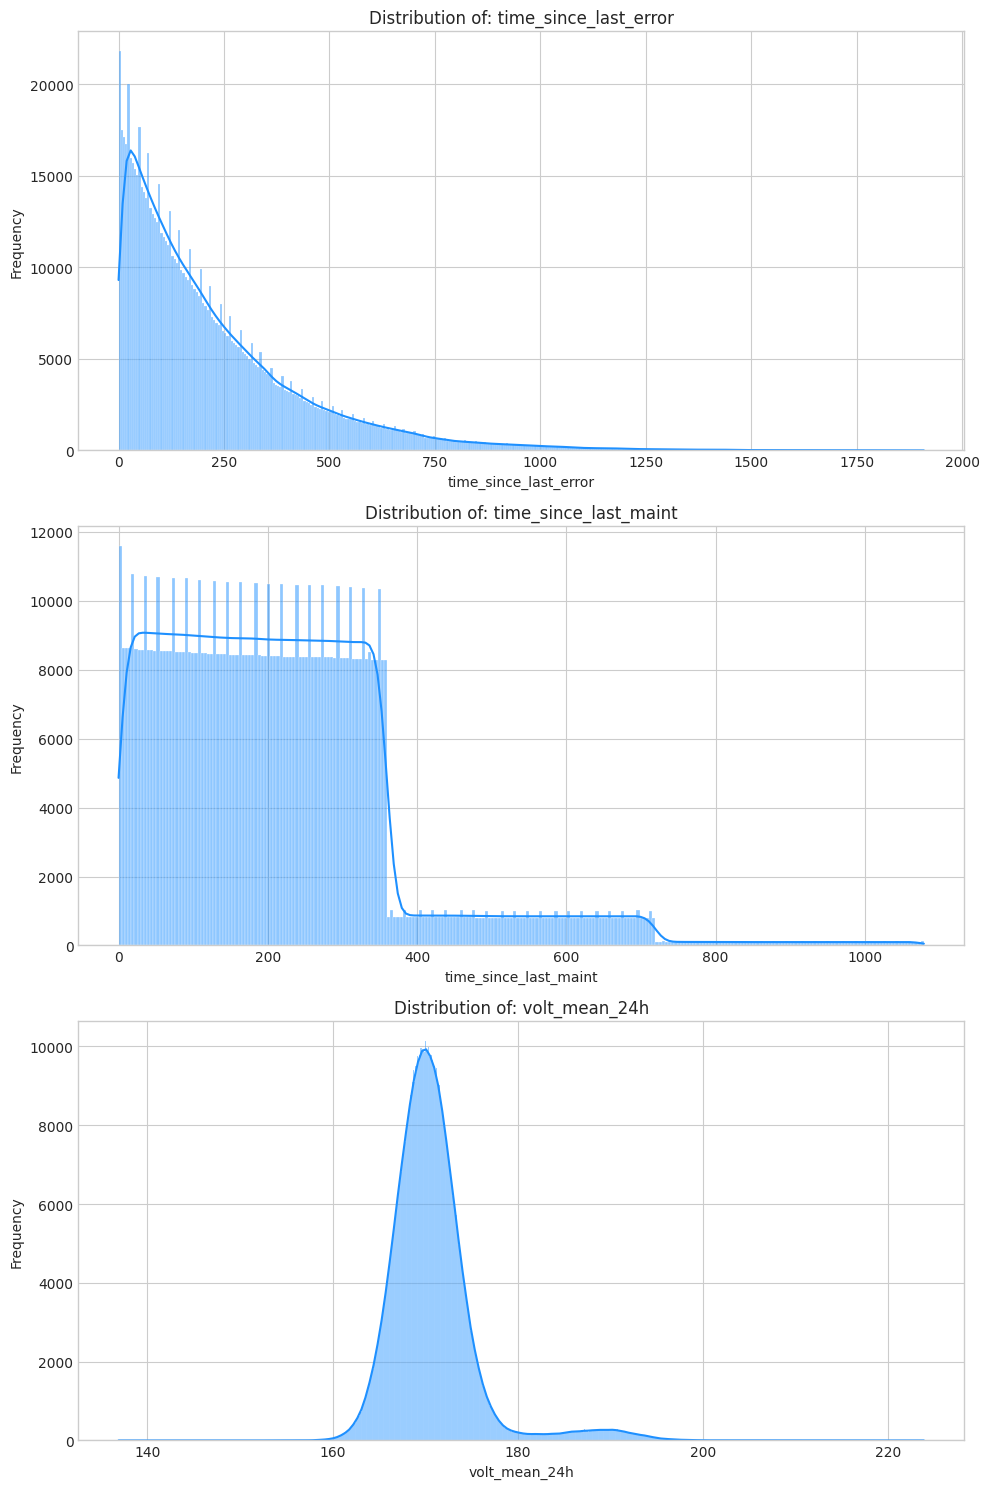

In [38]:
# Select some of the most important features for visualization
selected_features = ['time_since_last_error','time_since_last_maint', 'volt_mean_24h']

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(len(selected_features), 1, figsize=(10, 5 * len(selected_features)))

for i, col in enumerate(selected_features):
    sns.histplot(df_final[col].dropna(), kde=True, ax=axes[i], color='dodgerblue')
    axes[i].set_title(f'Distribution of: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Data Type Optimization for the Final Dataset

This method is an excellent and common way to optimize a Pandas DataFrame. It's concise, readable, and effectively reduces the memory footprint of the dataset. Here’s why this approach is considered good practice before saving or training a model:

* **Memory Efficiency**: By default, Pandas often uses `float64` and `int64` data types, which each consume 8 bytes of memory per value. For many datasets, this is excessive. This approach efficiently casts these to `float32` and `int32`, which only require 4 bytes per value. This can **cut the memory usage in half** for these columns.

* **Performance Improvement**: A smaller, more memory-efficient DataFrame is faster to work with. Reducing the memory footprint of the data can **significantly improve the performance** of subsequent operations, especially during the model training phase where the data is read and processed repeatedly.

* **Code Conciseness**: Using a dictionary comprehension within the `.astype()` method is a very "Pythonic" and elegant way to apply the same operation to multiple columns at once. It's a clean alternative to writing a more verbose loop, making the code easier to read and maintain.

In summary, this step is crucial for **data optimization**. It ensures the final DataFrame is as lean and fast as possible without losing any necessary precision, leading to a more efficient machine learning pipeline.

In [39]:
df_final = df_final.astype({col: 'float32' for col in df_final.select_dtypes(include='float64').columns})
df_final = df_final.astype({col: 'int32' for col in df_final.select_dtypes(include='int64').columns})
df_final.dtypes

datetime                    datetime64[ns]
machineID                            int32
model                               object
age                                  int32
failure                             object
                                 ...      
rolling_error_error2_72h           float32
rolling_error_error3_72h           float32
rolling_error_error4_72h           float32
rolling_error_error5_72h           float32
is_failure                         float32
Length: 75, dtype: object

## ✅ Dataset Export:


The last step in the data preparation process is to export the final, optimized DataFrame to a file. This step is crucial because it saves all feature engineering work, allowing for the prepared data to be loaded directly for model training without having to re-run the entire preparation process every time

In [40]:
# Define the output directory and filename for the final dataset
output_directory = './data/'
final_dataset_name = 'final_prepared_dataset'

# Create the output directory if it doesn't already exist
os.makedirs(output_directory, exist_ok=True)


# Export as a CSV file
df_final.to_csv(f'{output_directory}{final_dataset_name}.csv', index=False)

print(f"Final dataset exported to '{output_directory}{final_dataset_name}.csv'.")

Final dataset exported to './data/final_prepared_dataset.csv'.
